# Sanjana Gupta
# CSE-DS-C
# 2100321540141


# EDA on Iris Dataset using different graphs. 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['species'] = iris.target_names[iris.target]# Summary statistics
print(data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [6]:
iris_df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [7]:
missing_values = iris_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [8]:
print("Column Names:", iris_df.columns)

Column Names: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


# 1. Scatter Plot

A scatter plot is a type of data visualization that displays individual data points on a two-dimensional graph. Each point on the graph represents the values of two variables, one plotted along the x-axis (horizontal) and the other along the y-axis (vertical). Scatter plots are used to examine the relationship between two continuous variables and to identify patterns or trends in the data.

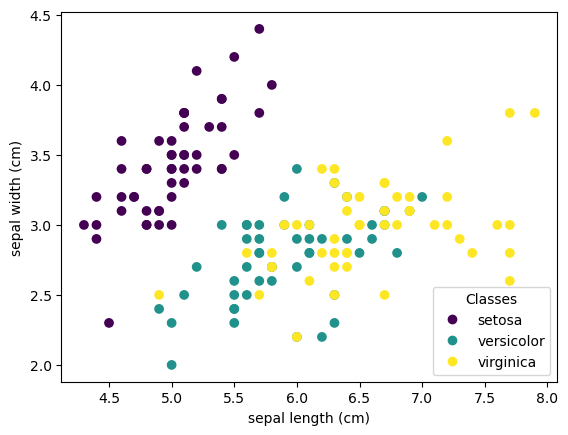

In [9]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

# 2. Pie Chart

Pie charts are generally suitable for categorical data where you're visualizing the distribution of parts relative to a whole. The Iris dataset primarily contains continuous numerical features. However, if you want to visualize the distribution of species, which is a categorical variable, you can create a pie chart. 

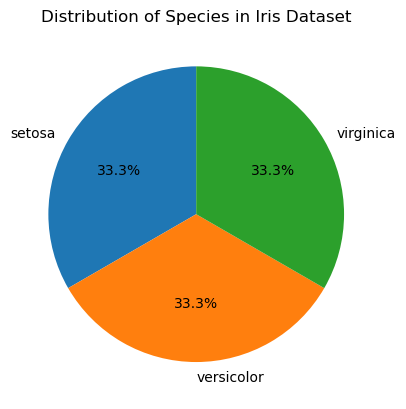

In [10]:
species_distribution = iris_df['species'].value_counts()
plt.pie(species_distribution, labels=species_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Species in Iris Dataset")
plt.show()

# 3. Pairplot
It creates a matrix of scatterplots and histograms for a set of variables. This matrix is useful for exploring the relationships between multiple variables in a dataset.

In a pair plot, each combination of variables is represented by a scatterplot, showing the correlation or distribution between them. The diagonal of the matrix usually contains histograms for each individual variable, displaying their distributions.

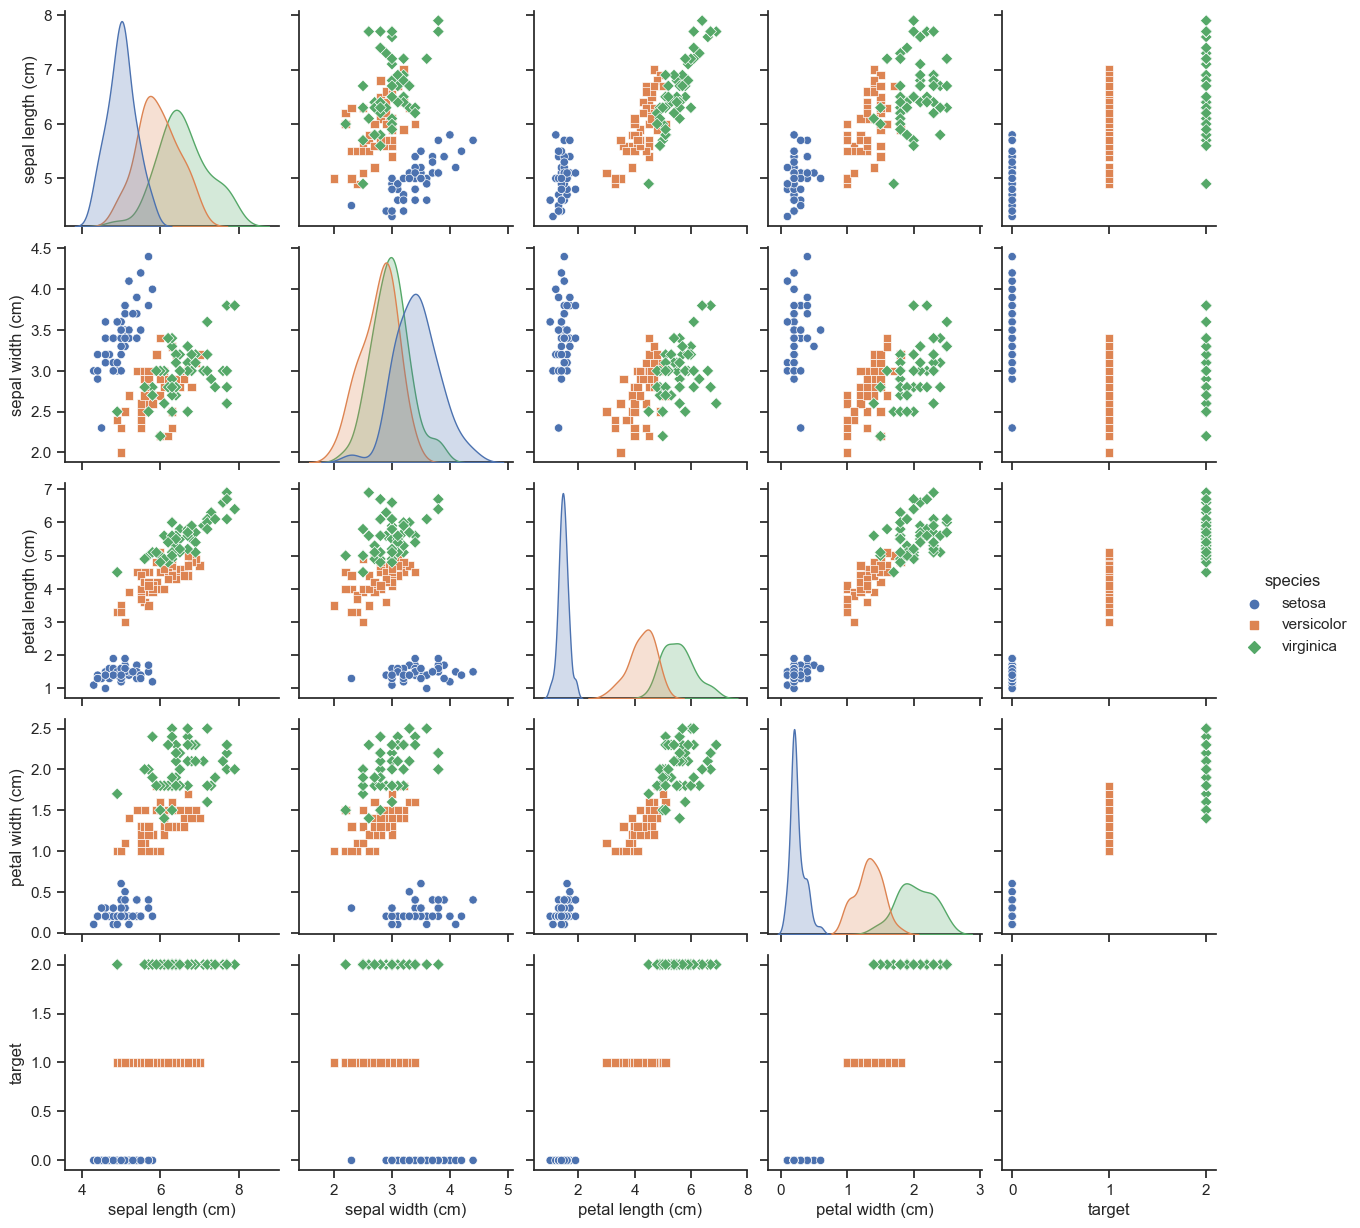

In [11]:
sns.set(style="ticks")
sns.pairplot(data, hue="species", markers=["o", "s", "D"])

# 4. Boxplots
A boxplot, also known as a box-and-whisker plot, is a statistical visualization that provides a summary of the distribution of a dataset. It is particularly useful for comparing distributions between different groups or visualizing the spread and central tendency of a single variable.

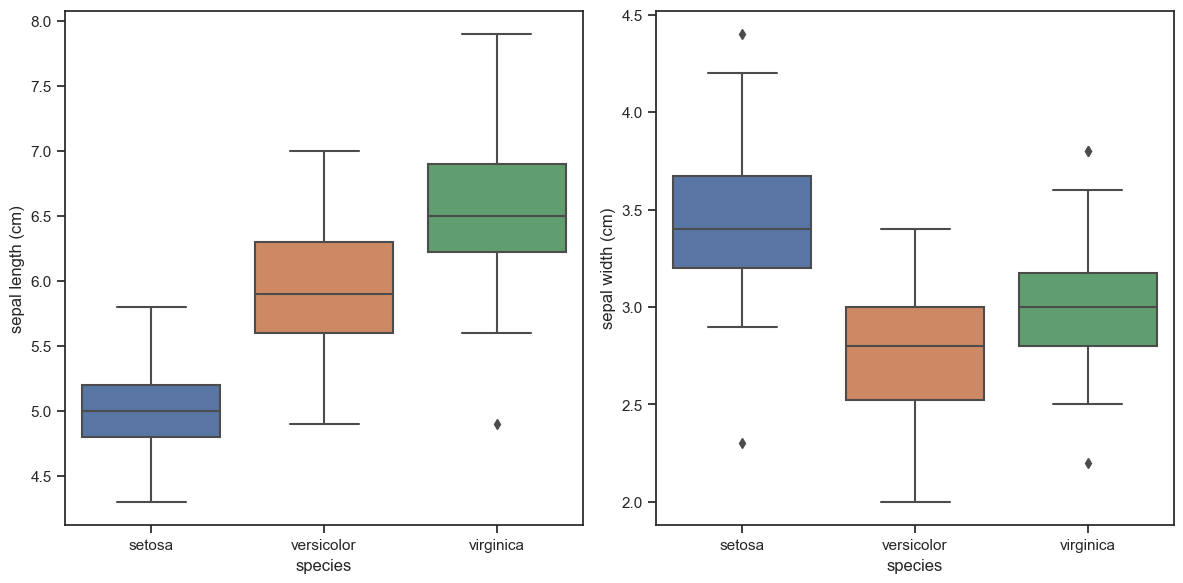

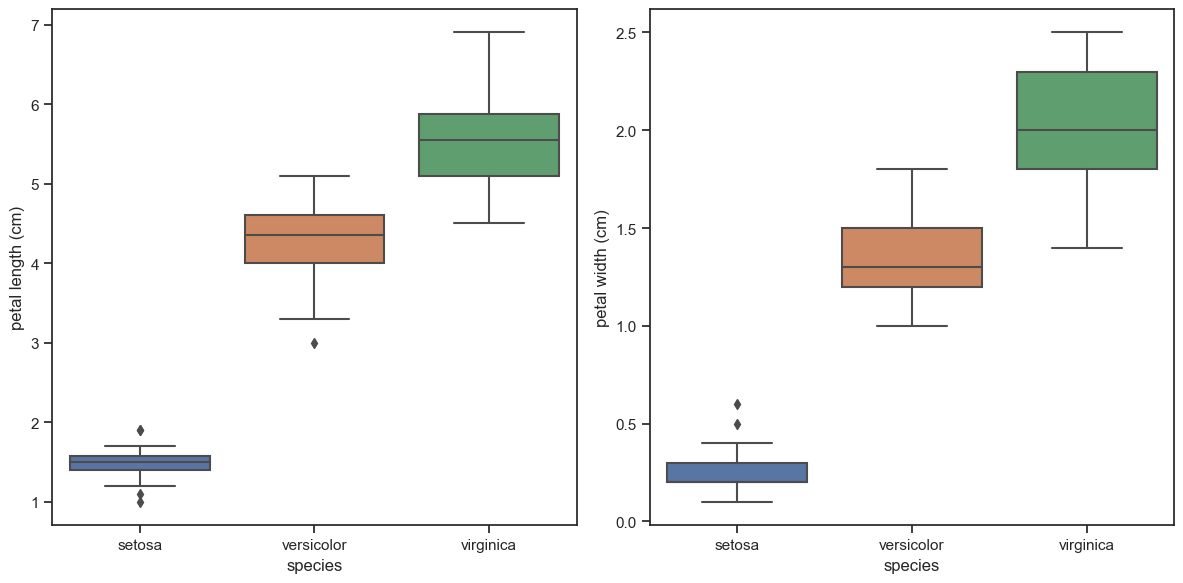

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="species", y="sepal length (cm)", data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x="species", y="sepal width (cm)", data=data)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="species", y="petal length (cm)", data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x="species", y="petal width (cm)", data=data)
plt.tight_layout()

# 5.Violin Plots

A violin plot is a statistical data visualization that combines aspects of a box plot and a kernel density plot. It provides information about the distribution of a dataset, including the probability density at different values. Violin plots are particularly useful when you want to compare the distribution of a variable across different categories or groups.

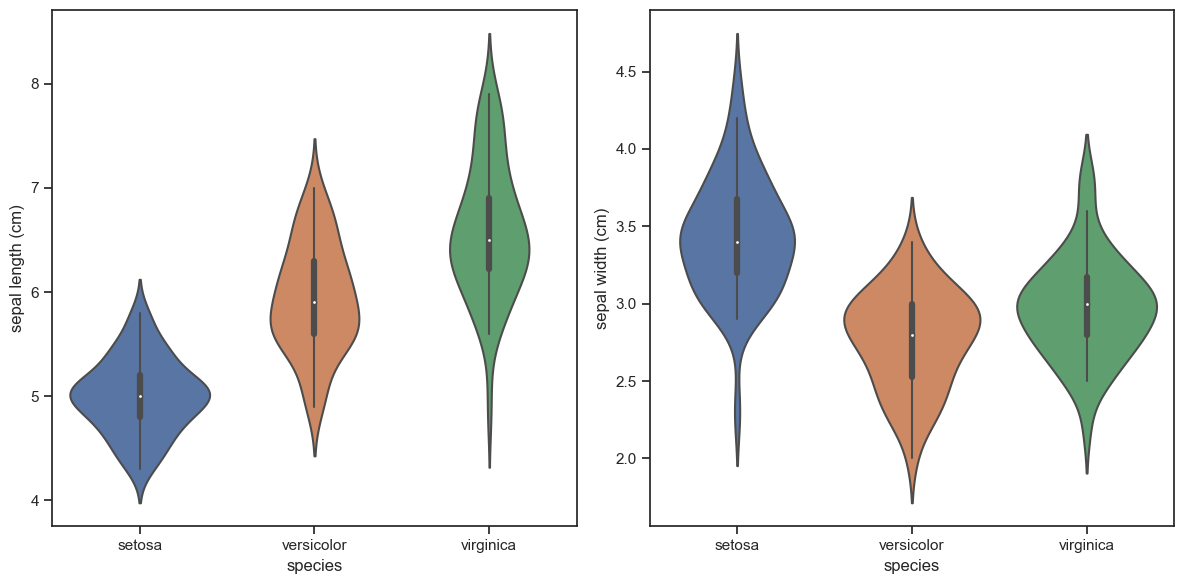

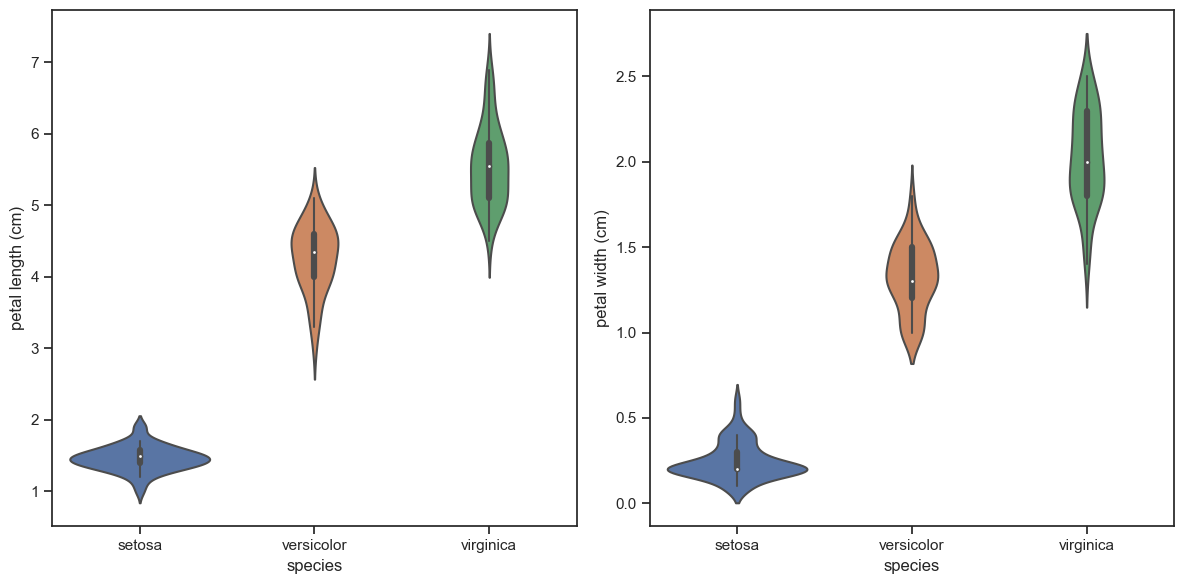

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x="species", y="sepal length (cm)", data=data)
plt.subplot(1, 2, 2)
sns.violinplot(x="species", y="sepal width (cm)", data=data)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x="species", y="petal length (cm)", data=data)
plt.subplot(1, 2, 2)
sns.violinplot(x="species", y="petal width (cm)", data=data)
plt.tight_layout()

# 6. Correlation Heatmap

A correlation heatmap is a graphical representation of the correlation matrix, typically using color to indicate the strength and direction of the relationships between variables in a dataset. Correlation matrices quantify the degree to which two variables change together. The heatmap makes it easy to identify patterns and relationships in large datasets.

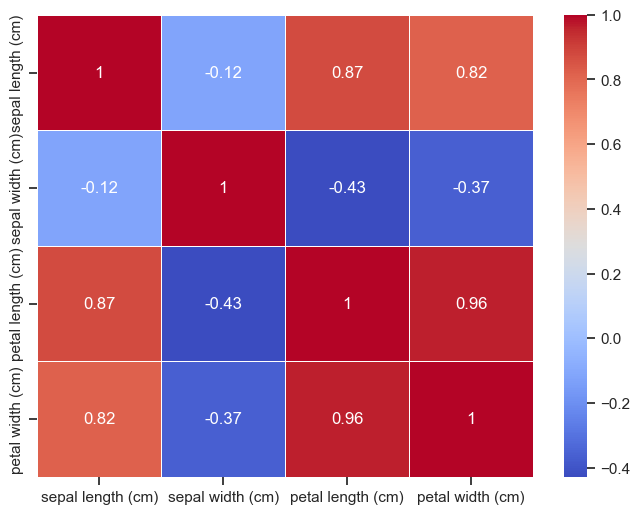

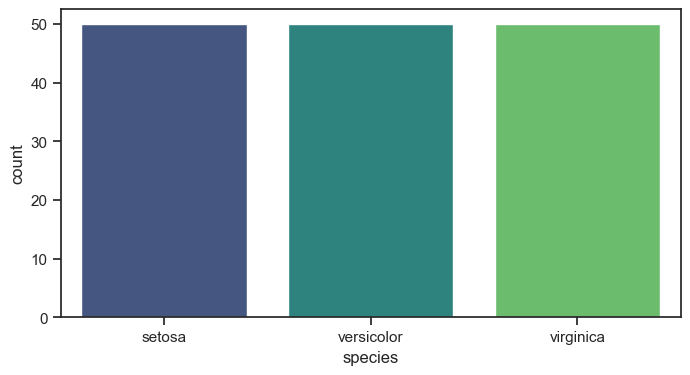

In [14]:
# Correlation heatmap
correlation_matrix = data.iloc[:, :4].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)# Countplot for species distribution
plt.figure(figsize=(8, 4))
sns.countplot(x="species", data=data, palette="viridis")
plt.show()

# 7. Histogram 
A histogram is a graphical representation of the distribution of a dataset. It is a way to visualize the underlying frequency distribution of a continuous variable. In a histogram, the data is divided into bins, and the number of data points falling into each bin is represented by the height of a bar. The bars are typically placed side by side, forming a continuous bar chart.

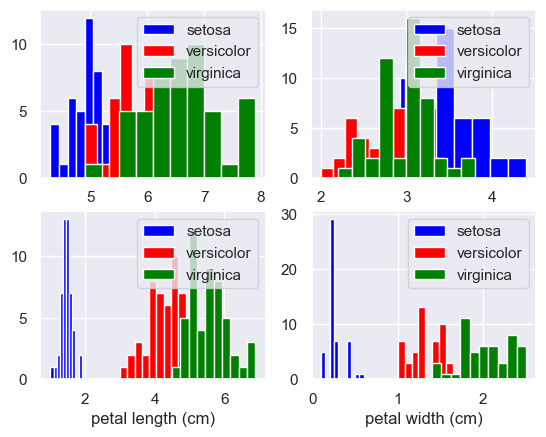

In [24]:
fig, axes = plt.subplots(nrows= 2, ncols=2)
colors= ['blue', 'red', 'green']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(iris.data[iris.target==label, i], label=             
                            iris.target_names[label], color=color)
        ax.set_xlabel(iris.feature_names[i])  
        ax.legend(loc='upper right')


plt.show()